<a href="https://colab.research.google.com/github/kiniv-21/PyTorch-Model-training-using-Synthetic-Data/blob/main/Training_First_PyTorch_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
X = np.random.rand(N,1)
epsilon = .1 * np.random.randn(N,1)
y = true_b + true_w * X + epsilon

# Train/ Validation Split
Splitting synthetic data into train and validation sets, shuffling the array of indices and using the first 80 shuffled points for training

In [4]:
# Shuffling Indices
idx = np.arange(N)
np.random.shuffle(idx)

# USes the first 80 random indices for train
train_idx = idx[:int(N*.8)]
val_idx = idx[int(N*.8)]

#Generates train and validation sets
X_train,y_train = X[train_idx],y[train_idx]
X_val, y_val = X[val_idx],y[val_idx]

Text(0.5, 1.0, 'Generated Data - Validation')

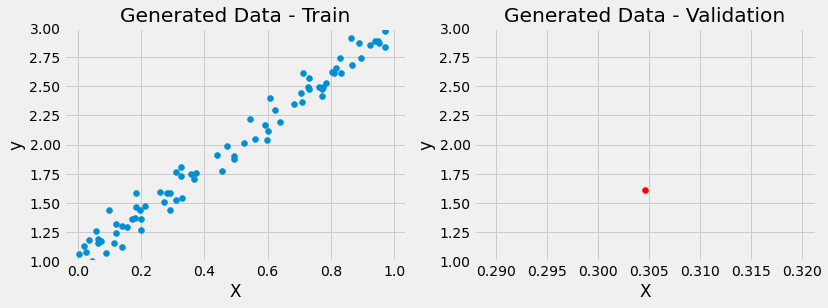

In [5]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(X_train, y_train)
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].set_ylim([1, 3])
ax[0].set_title('Generated Data - Train')
ax[1].scatter(X_val, y_val, c='r')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].set_ylim([1, 3])
ax[1].set_title('Generated Data - Validation')

# PyTorch: tensors, tensors, tensors

In [6]:
import torch
import torch.optim as optim
import torch.nn as nn

In Numpy, you may have an array that has three dimensions, right? That is, technically speaking, a tensor.

A scalar (a single number) has zero dimensions, a vector has one dimension, a matrix has two dimensions and a tensor has three or more dimensions. That’s it!

But, to keep things simple, it is commonplace to call vectors and matrices tensors as well — so, from now on, everything is either a scalar or a tensor.

You can create tensors in PyTorch pretty much the same way you create arrays in Numpy. Using tensor() you can create either a scalar or a tensor.

PyTorch's tensors have equivalent functions as its Numpy counterparts, like: ones(), zeros(), rand(), randn() and many more.

In [7]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[ 1.7944,  0.3652, -0.1384,  0.9156],
         [ 1.0132,  0.3741, -1.1390, -0.1468],
         [-0.5580,  1.0622,  0.1158,  1.0490]],

        [[ 1.7118, -0.2548,  0.0790,  1.2846],
         [ 0.0894,  0.3035, -1.0248, -0.4088],
         [ 1.0661, -0.7540,  2.3139,  2.9268]]])


You can get the shape of a tensor using its size() method or its shape attribute.

In [8]:
print(tensor.size(), tensor.shape)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


You can also reshape a tensor using its reshape() or view() methods.

Beware: these methods create a new tensor with the desired shape that shares the underlying data with the original tensor!

In [9]:
new_tensor1 = tensor.reshape(2, -1)
new_tensor2 = tensor.view(2, -1)
print(new_tensor1.shape, new_tensor2.shape)

torch.Size([2, 12]) torch.Size([2, 12])


If you want to copy all data for real, that is, duplicate it in memory, you should use either its new_tensor() or clone() methods.

# Loading Data, Devices and CUDA
”How do we go from Numpy’s arrays to PyTorch’s tensors”, you ask?

That’s what as_tensor() is good for. It returns a CPU tensor, though.

You can also easily cast it to a lower precision (32-bit float) using float().

In [12]:
# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train).float()

print(type(X_train), type(x_train_tensor))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


“But I want to use my fancy GPU…”, you say.

No worries, that’s what to() is good for. It sends your tensor to whatever device you specify, including your GPU (referred to as cuda or cuda:0).

“What if I want my code to fallback to CPU if no GPU is available?”, you may be wondering…

PyTorch got your back once more — you can use cuda.is_available() to find out if you have a GPU at your disposal and set your device accordingly.

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
x_train_tensor = torch.as_tensor(X_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

print(type(X_train), type(x_train_tensor))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


If you compare the **types** of both variables, you’ll get what you’d expect: `numpy.ndarray` for the first one and `torch.Tensor` for the second one.

But where does your nice tensor “live”? In your CPU or your GPU? You can’t say… but if you use PyTorch’s **type()**, it will reveal its **location** — `torch.cuda.FloatTensor` — a GPU tensor in this case.

In [15]:
print(x_train_tensor.type())

torch.cuda.FloatTensor


We can also go the other way around, turning tensors back into Numpy arrays, using numpy(). It should be easy as x_train_tensor.numpy() but…

In [16]:
x_train_tensor.numpy()

TypeError: ignored

Unfortunately, Numpy **cannot** handle GPU tensors… you need to make them CPU tensors first using [**cpu()**](https://bit.ly/2OSC1Th).

In [17]:
x_train_tensor.cpu().numpy()

array([[0.77127033],
       [0.06355835],
       [0.86310345],
       [0.02541913],
       [0.7319939 ],
       [0.07404465],
       [0.19871569],
       [0.31098232],
       [0.47221494],
       [0.96958464],
       [0.12203824],
       [0.77513283],
       [0.802197  ],
       [0.72960615],
       [0.09767211],
       [0.18485446],
       [0.15601864],
       [0.02058449],
       [0.9868869 ],
       [0.6232981 ],
       [0.7080726 ],
       [0.5979    ],
       [0.9218742 ],
       [0.63755745],
       [0.2809345 ],
       [0.25877997],
       [0.11959425],
       [0.7290072 ],
       [0.94888556],
       [0.60754484],
       [0.5612772 ],
       [0.4937956 ],
       [0.18182497],
       [0.27134904],
       [0.96990985],
       [0.21233912],
       [0.1834045 ],
       [0.8661761 ],
       [0.37454012],
       [0.29122913],
       [0.80839735],
       [0.05808361],
       [0.83244264],
       [0.54269606],
       [0.77224475],
       [0.88721275],
       [0.08849251],
       [0.045

Now that we know how to handle tensors, we can use them to build a...

# Dataset

In PyTorch, a dataset is represented by a regular Python class that inherits from the Dataset class. You can think of it as a kind of a Python list of tuples, each tuple corresponding to one point (features, label).

# Tensor Dataset

If a dataset is nothing else but a couple of tensors, we can use PyTorch’s TensorDataset class.

Let's create some tensors out of our training data and use them to build a dataset!

In [19]:
from torch.utils.data import TensorDataset

x_train_tensor = torch.as_tensor(X_train).float()
y_train_tensor = torch.as_tensor(y_train).float()

train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

(tensor([0.7713]), tensor([2.4745]))


---

Did you notice we built our **training tensors** out of Numpy arrays but we **did not send them to a device**? So, they are **CPU** tensors now! **Why**?

We **don’t want our whole training data to be loaded into GPU tensors** because **it takes up space** in our precious **graphics card’s RAM**.

---

OK, fine, but then again, why are we building a dataset anyway? We’re doing it because we want to use a…

# DataLoader, splitting your data into mini-batches

We use PyTorch’s DataLoader class for this job. We tell it which dataset to use (the one we just built in the previous section), the desired mini-batch size and if we’d like to shuffle it or not. That’s it!

Our loader will behave like an iterator, so we can loop over it and fetch a different mini-batch every time.

In [20]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)

To retrieve a mini-batch, one can simply run the command below — it will return a list containing two tensors, one for the features, another one for the labels.

In [21]:
x_train_batch, y_train_batch = next(iter(train_loader))
# we send the mini-batch to a device
x_train_batch = x_train_batch.to(device)
y_train_batch = y_train_batch.to(device)

Cool, we loaded our training data into a TensorDataset, and used a DataLoader to generate mini-batches. Now it's time to handle other type of tensors...

# Creating Tensor for Parameters

What distinguishes a *tensor* used for *data* — like the ones we’ve just created — from a **tensor** used as a (*trainable*) **parameter/weight**?

The latter tensors require the **computation of its gradients**, so we can **update** their values (the parameters’ values, that is). That’s what the **`requires_grad=True`** argument is good for. It tells PyTorch we want it to compute gradients for us.

---

<h2><b><i>A tensor for a learnable parameter requires gradient!</i></b></h2>

---

You may be tempted to create a simple tensor for a parameter and, later on, send it to your chosen device, as we did with our data, right?

Actually, you should **assign** tensors to a **device** at the moment of their **creation** to avoid unexpected behaviors...

In [22]:
# We can specify the device at the moment of creation - RECOMMENDED!
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b, w)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


That works fine for a tiny model like ours, but it isn't practical at all if the model has many parameters. Luckily, we can replace a bunch of individual parameters for a single Linear layer.

In [23]:
torch.manual_seed(42)
layer = nn.Linear(1, 1)
print(layer.bias, layer.weight)

Parameter containing:
tensor([0.8300], requires_grad=True) Parameter containing:
tensor([[0.7645]], requires_grad=True)


# Layers

A **Linear** model can be seen as a **layer** in a neural network.

<p align="center">
<img src="https://raw.githubusercontent.com/dvgodoy/AnalyticsVidhya_DataHour_PyTorch/main/images/layer.png" width="50%" height="50%">
</p>

In the example above, the **hidden layer** would be `nn.Linear(3, 5)` and the **output layer** would be `nn.Linear(5, 1)`.


There are **MANY** different layers that can be uses in PyTorch:
- [Convolution Layers](https://pytorch.org/docs/stable/nn.html#convolution-layers)
- [Pooling Layers](https://pytorch.org/docs/stable/nn.html#pooling-layers)
- [Padding Layers](https://pytorch.org/docs/stable/nn.html#padding-layers)
- [Non-linear Activations](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
- [Normalization Layers](https://pytorch.org/docs/stable/nn.html#normalization-layers)
- [Recurrent Layers](https://pytorch.org/docs/stable/nn.html#recurrent-layers)
- [Transformer Layers](https://pytorch.org/docs/stable/nn.html#transformer-layers)
- [Linear Layers](https://pytorch.org/docs/stable/nn.html#linear-layers)
- [Dropout Layers](https://pytorch.org/docs/stable/nn.html#dropout-layers)
- [Sparse Layers (embbedings)](https://pytorch.org/docs/stable/nn.html#sparse-layers)
- [Vision Layers](https://pytorch.org/docs/stable/nn.html#vision-layers)
- [DataParallel Layers (multi-GPU)](https://pytorch.org/docs/stable/nn.html#dataparallel-layers-multi-gpu-distributed)
- [Flatten Layer](https://pytorch.org/docs/stable/nn.html#flatten)

We have just used a **Linear** layer.

Moreover, if we're sticking with a simple and straightforward model where the output of each layer feeds directly into the next, we can line them up using a sequential model!

<h2><b><i>Run-of-the-mill layers? Sequential model!</b></i></h2>

For **straightforward models**, that use **run-of-the-mill layers**, where the output of a layer is sequentially fed as an input to the next, we can use a, er… [**Sequential**](https://bit.ly/3hRQTxP) model :-)

In our case, we would build a Sequential model with a single argument, that is, the Linear layer we used to train our linear regression. The model would look like this:

In [24]:
n_features = 1
n_outputs = 1

torch.manual_seed(42)
model = nn.Sequential()
model.add_module('linear', nn.Linear(n_features, n_outputs, bias=True))
model

Sequential(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### Device

**IMPORTANT**: we need to **send our model to the same device where the data is**. If our data is made of GPU tensors, our model must “live” inside the GPU as well.

In [25]:
model.to(device)

Sequential(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### state_dict

The **state_dict()** of a given model is simply a Python dictionary that **maps each layer / parameter to its corresponding tensor**. But only **learnable** parameters are included, as its purpose is to keep track of parameters that are going to be updated.

In [26]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear.bias', tensor([0.8300], device='cuda:0'))])

In [27]:
model.linear.weight

Parameter containing:
tensor([[0.7645]], device='cuda:0', requires_grad=True)

Now that we know how to create tensors and models that require gradients, let’s see how PyTorch handles them — that’s the role of the…

## Gradient Descent in 5 easy steps!

Gradient descent is the most common **optimization algorithm** in Machine Learning and Deep Learning.

The purpose of using gradient descent is **to minimize the loss**, that is, **minimize the errors between predictions and actual values** (and sometimes some other term as well).

It goes beyond the scope of this tutorial to fully explain how gradient descent works, but I'll cover the **five basic steps** you'd need to go through to compute it, namely:

- Step 0: Random initialize parameters / weights
- Step 1: Compute model's predictions - forward pass
- Step 2: Compute loss
- Step 3: Compute the gradients
- Step 4: Update the parameters
- Step 5: Rinse and repeat!

---

If you want to learn more about gradient descent, check the following resources:
- [**Linear Regression Simulator**](https://www.mladdict.com/linear-regression-simulator), which goes through the very same steps listed here
- [**A Visual and Interactive Guide to the Basics of Neural Networks**](http://jalammar.github.io/visual-interactive-guide-basics-neural-networks/)
- [**Gradient Descent Algorithms and Its Variants**](https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3)

---

### Step 0: Initialization

Technically, this step is not part of gradient descent, but it is an important step nonetheless.

For training a model, you need to **randomly initialize the parameters/weights**.

Make sure to *always initialize your random seed* to ensure **reproducibility** of your results. As usual, the random seed is [42](https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy#Answer_to_the_Ultimate_Question_of_Life,_the_Universe,_and_Everything_(42)), the *least random* of all random seeds one could possibly choose :-)

In [28]:
# Step 0
torch.manual_seed(42)

model = nn.Sequential()
model.add_module('linear', nn.Linear(n_features, n_outputs, bias=True))
model.to(device)
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')), ('linear.bias', tensor([0.8300], device='cuda:0'))])


### Step 1: Compute Model's Predictions

This is the **forward pass** - it simply *computes the model's predictions using the current values of the parameters/weights*. At the very beginning, we will be producing really bad predictions, as we started with random values from Step 0.

Predictions for a simple linear regression like ours *could* be computed like this, but that's not practical at all...

In [29]:
yhat = model.linear.bias + model.linear.weight * x_train_batch
yhat[:3]

tensor([[0.9186],
        [1.4204],
        [1.2829]], device='cuda:0', grad_fn=<SliceBackward0>)

We can use our model class instead:

In [30]:
yhat = model(x_train_batch)
yhat[:3]

tensor([[0.9186],
        [1.4204],
        [1.2829]], device='cuda:0', grad_fn=<SliceBackward0>)

---

Even though models have a `forward` method, you should **NOT call the `forward(x)`** method. You should always **call the whole model itself**, as in **`model(x)`** to perform a forward pass and output predictions.

---

In PyTorch, models have a [**train()**](https://bit.ly/30VW2Ox) method which, somewhat disappointingly, **does NOT perform a training step**. Its only purpose is to **set the model to training mode**. 

Why is this important? Some models may use mechanisms like [**Dropout**](https://bit.ly/2X7v5pU), for instance, which have **distinct behaviors in training and evaluation phases**.

In [31]:
# Step 1
# Computes our model's predicted output
model.train()
yhat = model(x_train_batch)
yhat[:3]

tensor([[0.9186],
        [1.4204],
        [1.2829]], device='cuda:0', grad_fn=<SliceBackward0>)

There is a subtle but fundamental difference between **error** and **loss**. 

The **error** is the difference between **actual** and **predicted** computed for a single data point.

$$
\Large \text{error}_i = \hat{y_i} - y_i
$$

The **loss**, on the other hand, is some sort of **aggregation of errors for a set of data points**.

For a regression problem, the **loss** is given by the **Mean Squared Error (MSE)**, that is, the average of all squared differences between **actual values** (y) and **predictions** (a + bx).

$$
\large \text{MSE} = \frac{1}{N} \sum_{i=1}^N{\text{error}_i}^2
$$

$$
\large \text{MSE} = \frac{1}{N} \sum_{i=1}^N{(\hat{y_i} - y_i)}^2
$$

$$
\large \text{MSE} = \frac{1}{N} \sum_{i=1}^N{(b + w x_i - y_i)}^2
$$

---

It is worth mentioning that, if we **compute the loss** using:
- **all points** in the training set (N), we are performing a **batch** gradient descent
- a **single point** at each time, it would be a **stochastic** gradient descent
- anything else (n) **in-between 1 and N** characterizes a **mini-batch** gradient descent

---

<p align="center">
<img src="https://raw.githubusercontent.com/dvgodoy/AnalyticsVidhya_DataHour_PyTorch/main/images/gradient_descent.png">
</p>

In [32]:
# How wrong is our model? That's the error! 
error = (yhat - y_train_batch)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

tensor(0.7127, device='cuda:0', grad_fn=<MeanBackward0>)


### Loss: aggregating errors into a single value

Computing losses manually isn't great. Luckily, PyTorch got us covered once again. There are many [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions) to choose from, depending on the task at hand. Since ours is a regression, we are using the [Mean Square Error (MSE)](https://bit.ly/3hNYn4R) loss.

---

Notice that `nn.MSELoss` actually **creates a loss function** for us — **it is NOT the loss function itself**. Moreover, you can specify a **reduction method** to be applied, that is, **how do you want to aggregate the results for individual points** — you can average them (reduction=’mean’) or simply sum them up (reduction=’sum’).

---

In [33]:
# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

loss_fn

MSELoss()

We then **use** the created loss function to compute the loss given our **predictions** and our **labels**.

In [34]:
loss = loss_fn(yhat, y_train_batch)
loss

tensor(0.7127, device='cuda:0', grad_fn=<MseLossBackward0>)

### Step 3: Compute the Gradients

A **gradient** is a **partial derivative** — *why partial*? Because one computes it with respect to (w.r.t.) a **single parameter**. We have two parameters, **b** and **w**, so we must compute two partial derivatives.

A **derivative** tells you *how much* **a given quantity changes** when you *slightly* vary some **other quantity**. In our case, how much does our **MSE** **loss** change when we vary **each one of our two parameters**?

The *right-most* part of the equations below is what you usually see in implementations of gradient descent for a simple linear regression. In the **intermediate step**, I show you **all elements** that pop-up from the application of the [chain rule](https://en.wikipedia.org/wiki/Chain_rule), so you know how the final expression came to be.

---

<h3><i><b>Gradient = how much the LOSS changes if ONE parameter changes a little bit!</b></i></h3>

---

**Gradients**:

$$
\large \frac{\partial{\text{MSE}}}{\partial{b}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{b}} = \frac{1}{N} \sum_{i=1}^N{2(b + w x_i - y_i)} = 2 \frac{1}{N} \sum_{i=1}^N{(\hat{y_i} - y_i)}
$$ 

$$
\large \frac{\partial{\text{MSE}}}{\partial{w}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{w}} = \frac{1}{N} \sum_{i=1}^N{2(b + w x_i - y_i) \cdot x_i} = 2 \frac{1}{N} \sum_{i=1}^N{x_i (\hat{y_i} - y_i)}
$$


In [36]:
# Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train_batch * error).mean()
print(b_grad, w_grad)

tensor(-1.4898, device='cuda:0', grad_fn=<MulBackward0>) tensor(-0.9395, device='cuda:0', grad_fn=<MulBackward0>)


## Autograd, your companion for all your gradient needs!

Autograd is PyTorch’s *automatic differentiation package*. Thanks to it, we **don’t need to worry** about partial derivatives, chain rule or anything like it.

<h2><b><i>Computing gradients manually?! No way! Backward!</b></i></h2>


### backward

So, how do we tell PyTorch to do its thing and **compute all gradients**? That’s what [**backward()**](https://bit.ly/3eV9Dub) is good for.

Do you remember the **starting point** for **computing the gradients**? It was the **loss**, as we computed its partial derivatives w.r.t. our parameters. Hence, we need to invoke the `backward()` method from the corresponding Python variable, like, `loss.backward()`.

In [37]:
yhat = model(x_train_batch)
loss = loss_fn(yhat, y_train_batch)
# Step 3    
# No more manual computation of gradients! 
loss.backward()

### grad / zero_


What about the **actual values** of the **gradients**? We can inspect them by looking at the [**grad**](https://bit.ly/3fYtNFa) **attribute** of a tensor.

In [38]:
model.linear.weight.grad, model.linear.bias.grad

(tensor([[-0.9395]], device='cuda:0'), tensor([-1.4898], device='cuda:0'))

If you check the method’s documentation, it clearly states that **gradients are accumulated**. 

So, every time we use the **gradients** to **update** the parameters, we need to **zero the gradients afterwards**. And that’s what [**zero_()**](https://pytorch.org/docs/stable/generated/torch.Tensor.zero_.html#torch.Tensor.zero_) is good for.

---

*In PyTorch, every method that **ends** with an **underscore (_)** makes changes **in-place**, meaning, they will **modify** the underlying variable.*

---

In [39]:
model.linear.weight.grad.zero_(), model.linear.bias.grad.zero_()

(tensor([[0.]], device='cuda:0'), tensor([0.], device='cuda:0'))

### Step 4: Update the Parameters

In the final step, we **use the gradients to update** the parameters. Since we are trying to **minimize** our **losses**, we **reverse the sign** of the gradient for the update.

There is still another parameter to consider: the **learning rate**, denoted by the *Greek letter* **eta** (that looks like the letter **n**), which is the **multiplicative factor** that we need to apply to the gradient for the parameter update.

**Parameters**:

$$
\large b = b - \eta \frac{\partial{\text{MSE}}}{\partial{b}}
$$

$$
\large w = w - \eta \frac{\partial{\text{MSE}}}{\partial{w}}
$$

### Optimizer:  learning the parameters step-by-step

Updating parameters **manually** is probably fine for *two parameters*… but what if we had a **whole lot of them**?! We use one of PyTorch’s **optimizers**, like [SGD](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) or [Adam](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam).

---

There are **many** optimizers, **SGD** is the most basic of them and **Adam** is one of the most popular. They achieve the same goal through, literally, **different paths**.

<p align="center">
<img src="https://raw.githubusercontent.com/dvgodoy/AnalyticsVidhya_DataHour_PyTorch/main/images/sgd_adam_paths.png" width="50%"/>
</p>

---

In the code below, we create a *Stochastic Gradient Descent* (SGD) optimizer to update our parameters **b** and **w**.

---

Don’t be fooled by the **optimizer’s** name: if we use **all training data** at once for the update the optimizer is performing a **batch** gradient descent, despite of its name.

---

Let's start with a value of **0.1** (which is a relatively *high value*, as far as learning rates are concerned!).

In [40]:
# Learning rate
lr = 1e-1
# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD(model.parameters(), lr=lr)

In [41]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

### step / zero_grad

An optimizer takes the **parameters** we want to update, the **learning rate** we want to use (and possibly many other hyper-parameters as well!) and **performs the updates** through its [**`step()`**](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html#torch.optim.Optimizer.step) method.

In [42]:
yhat = model(x_train_batch)
loss = loss_fn(yhat, y_train_batch)

loss.backward()
print(model.linear.weight.grad, model.linear.bias.grad)

tensor([[-0.9395]], device='cuda:0') tensor([-1.4898], device='cuda:0')


In [43]:
optimizer.step()
print(model.linear.weight.grad, model.linear.bias.grad)

tensor([[-0.9395]], device='cuda:0') tensor([-1.4898], device='cuda:0')


Besides, we also don’t need to zero the gradients one by one anymore. We just invoke the optimizer’s [**`zero_grad()`**](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html#torch.optim.Optimizer.zero_grad) method and that’s it!

In [44]:
optimizer.zero_grad()
print(model.linear.weight.grad, model.linear.bias.grad)

tensor([[0.]], device='cuda:0') tensor([0.], device='cuda:0')


In [45]:
print(model.linear.weight, model.linear.bias)

Parameter containing:
tensor([[0.8585]], device='cuda:0', requires_grad=True) Parameter containing:
tensor([0.9790], device='cuda:0', requires_grad=True)


---

<h2><b><i>"Choose your learning rate wisely..."</b></i></h2>

<h3><i><b>The learning rate is the single most important hyper-parameter to tune when you are using Deep Learning models!</b></i></h3>

What happens if I choose the learning rate **poorly**? Your model may **take too long to train** or **get stuck with a high loss** or, even worse, **diverge into an exploding loss**!

<p align="center">
<img src="https://raw.githubusercontent.com/dvgodoy/AnalyticsVidhya_DataHour_PyTorch/main/images/learning_rates.png" width="50%">
</p>

---

### Step 5: Rinse and Repeat!

Now we use the **updated parameters** to go back to **Step 1** and restart the process.

Repeating this process over and over, for **many epochs**, is, in a nutshell, **training** a model.

---

An **epoch** is complete whenever **every point has been already used once for computing the loss**: 
- **batch** gradient descent: this is trivial, as it uses all points for computing the loss — **one epoch** is the same as **one update**
- **stochastic** gradient descent: **one epoch** means **N updates**
- **mini-batch** (of size n): **one epoch** has **N/n updates**

---


Let's put the previous pieces of code together and loop over many epochs:

In [46]:
lr = 0.1
# Defines number of epochs
n_epochs = 200

torch.manual_seed(42)

n_features = 1
n_outputs = 1
model = nn.Sequential()
model.add_module('linear', nn.Linear(n_features, n_outputs, bias=True))
model.to(device)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    for x_train_batch, y_train_batch in train_loader:
        x_train_batch = x_train_batch.to(device)
        y_train_batch = y_train_batch.to(device)
        # Step 1
        yhat = model(x_train_batch)

        # Step 2
        loss = loss_fn(yhat, y_train_batch)

        # Step 3
        loss.backward() 

        # Step 4
        optimizer.step()
        optimizer.zero_grad()

In [47]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[1.9684]], device='cuda:0')), ('linear.bias', tensor([1.0219], device='cuda:0'))])


Just keep in mind that, if you **don’t** use batch gradient descent (our example does), you’ll have to write an **inner loop** to perform the **four training steps** for either each **individual point** (**stochastic**) or **n points** (**mini-batch**). We’ll see a mini-batch example later down the line.

### Sanity Check

Just to make sure we haven’t done any mistakes in our code, we can use *Scikit-Learn’s Linear Regression* to fit the model and compare the coefficients.

In [49]:
# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


They **match** — we have a *fully working implementation of linear regression* using PyTorch!

Finally, we managed to successfully run our model and get the **resulting parameters**. Surely enough, they **match** the ones we got in our *Numpy*-only implementation.

Let's take a look at the **loss** at the end of the training...

In [50]:
loss

tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward0>)

What if we wanted to have it as a *Numpy* array? I guess we could just use **numpy()** again, right? (and **cpu()** as well, since our *loss* is in the `cuda` device...

In [51]:
loss.cpu().numpy()

RuntimeError: ignored

What happened here? Unlike our *data tensors*, the **loss tensor** is actually computing gradients - and in order to use **numpy**, we need to [**detach()**](https://pytorch.org/docs/stable/generated/torch.Tensor.detach.html#torch.Tensor.detach) that tensor from the computation graph first:

In [52]:
loss.detach().cpu().numpy()

array(0.00944467, dtype=float32)

This seems like **a lot of work**, there must be an easier way! And there is one indeed: we can use [**item()**](https://pytorch.org/docs/stable/generated/torch.Tensor.item.html#torch.Tensor.item), for **tensors with a single element** or [**tolist()**](https://pytorch.org/docs/stable/generated/torch.Tensor.tolist.html#torch.Tensor.tolist) otherwise.

In [53]:
print(loss.item(), loss.tolist())

0.009444665163755417 0.009444665163755417
